## Poster Euclidian Metrics ##

In [1]:
#imports
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
import seaborn as sns
from pyvbmc import VBMC # VMBC object
from pyvbmc import VariationalPosterior
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.integrate as integrate
from pyvbmc.parameter_transformer import ParameterTransformer


In [2]:
a_min = 0.0
a_max = 0.5
b_min = 1.0
b_max = 5.0
N = 10
Na = N
Nb = N

# reading in saved vps and their associated parameter values
param_values = np.loadtxt("param_values.csv")
vps = []
vbmcs = []
for i in range(len(param_values)):
    vps.append(VariationalPosterior.load("vp" + str(i) + ".pkl"))
    vbmcs.append(VariationalPosterior.load("vbmc" + str(i) + ".pkl"))

In [3]:
def euclidean_metric(vp,truth_array,D,LB,UB,PLB,PUB, n_samples = int(1e6),original = False):
    """
    Finds distance between truth and mean of samples from vp in unconstrained space
    """
    scaler = ParameterTransformer(D,LB,UB,PLB,PUB)
    scaled_truth = scaler.__call__(truth_array)
    Xs, _ = vp.sample(n_samples, orig_flag = False)
    mean = np.array([Xs[:,i].mean() for i in range(D)])
    if original:
        return np.linalg.norm(scaler.inverse(mean-scaled_truth))
    else:
        return np.linalg.norm(mean-scaled_truth)   

In [4]:
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

#x0 = np.full((1, D), a_true+0.1) # starting point for inference   # 1.5 * np.ones((1, D))
#0[0][1] = b_true + 0.1

#print(LB,PLB,PUB,UB,'x0:',x0)

In [5]:
euclidean_grid = np.zeros((N,N))
#CI_grid = np.zeros((N,N))
count = 0
for i,a in enumerate(np.linspace(a_min,a_max,N)):     # a will be y axis in grid
    for j,b in enumerate(np.linspace(b_min,b_max,N)): # b will be x axis in grid
        euclidean_grid[i,j] = euclidean_metric(vps[count],np.atleast_2d(param_values[count]), D, LB, UB, PLB, PUB )
        print("vp" + str(count))
        count += 1

print(count)

vp0
vp1
vp2
vp3
vp4
vp5
vp6
vp7
vp8
vp9
vp10
vp11
vp12
vp13
vp14
vp15
vp16
vp17
vp18
vp19
vp20
vp21
vp22
vp23
vp24
vp25
vp26
vp27
vp28
vp29
vp30
vp31
vp32
vp33
vp34
vp35
vp36
vp37
vp38
vp39
vp40
vp41
vp42
vp43
vp44
vp45
vp46
vp47
vp48
vp49
vp50
vp51
vp52
vp53
vp54
vp55
vp56
vp57
vp58
vp59
vp60
vp61
vp62
vp63
vp64
vp65
vp66
vp67
vp68
vp69
vp70
vp71
vp72
vp73
vp74
vp75
vp76
vp77
vp78
vp79
vp80
vp81
vp82
vp83
vp84
vp85
vp86
vp87
vp88
vp89
vp90
vp91
vp92
vp93
vp94
vp95
vp96
vp97
vp98
vp99
100


In [17]:
# print(euclidean_grid[1:(len(euclidean_grid)-1)])
# euclidean_grid_almost = euclidean_grid[1:(len(euclidean_grid)-1)]
# euclidean_grid_almost[:,1:9]
euclidean_grid[1:9][:,1:9]

array([[ 8.05633833, 35.4081224 , 41.33441598, 37.79524072, 35.82634351,
        14.65718413,  3.92032706,  9.15538178],
       [38.25631233, 38.40541206, 39.26807793, 25.54023717,  9.71809232,
        13.07272229, 40.23729788, 69.09661684],
       [36.00314402, 34.66702226, 26.4572198 ,  8.13916493, 12.33084383,
        17.94422585, 55.32812126, 88.12852617],
       [31.74323268, 28.27086281, 14.35163003,  2.88231764, 24.15308171,
        56.24618381, 95.62104974, 44.30818801],
       [28.29756742, 22.6137609 ,  9.69400336, 12.98167671, 16.67446132,
        19.35289465, 70.39853453, 51.81351388],
       [29.74510912, 17.15283331, 13.53449855,  5.09443547, 12.81619781,
        30.01138487, 87.80817528, 46.95163579],
       [30.63384526, 18.1198388 ,  7.52914832,  7.85018836, 17.06574845,
        33.35929755, 36.86319091, 54.11815331],
       [18.68379719, 18.01264365, 12.30714309,  7.93834   , 22.68390539,
        33.00817418, 46.46087455, 62.543635  ]])

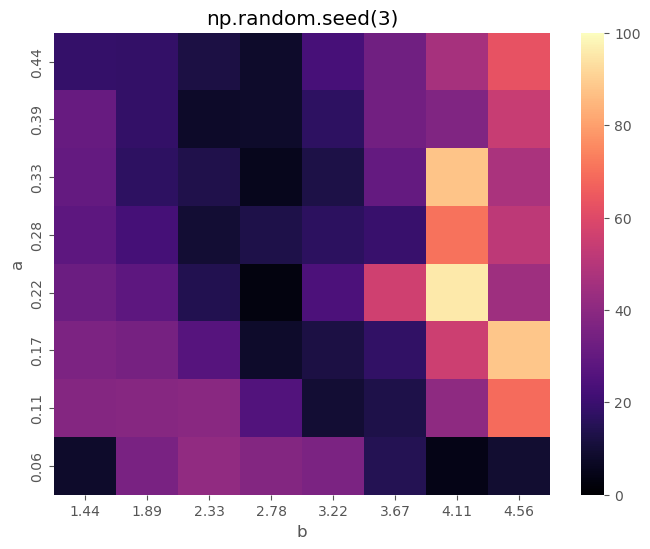

[[        inf         inf         inf         inf         inf         inf
          inf         inf         inf         inf]
 [        inf  8.05633833 35.4081224  41.33441598 37.79524072 35.82634351
  14.65718413  3.92032706  9.15538178         inf]
 [        inf 38.25631233 38.40541206 39.26807793 25.54023717  9.71809232
  13.07272229 40.23729788 69.09661684         inf]
 [        inf 36.00314402 34.66702226 26.4572198   8.13916493 12.33084383
  17.94422585 55.32812126 88.12852617         inf]
 [        inf 31.74323268 28.27086281 14.35163003  2.88231764 24.15308171
  56.24618381 95.62104974 44.30818801         inf]
 [        inf 28.29756742 22.6137609   9.69400336 12.98167671 16.67446132
  19.35289465 70.39853453 51.81351388         inf]
 [        inf 29.74510912 17.15283331 13.53449855  5.09443547 12.81619781
  30.01138487 87.80817528 46.95163579         inf]
 [        inf 30.63384526 18.1198388   7.52914832  7.85018836 17.06574845
  33.35929755 36.86319091 54.11815331         inf]


In [26]:
colormap = sns.color_palette("magma", as_cmap=True)
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.heatmap(np.flip(euclidean_grid[1:9][:,1:9], axis = 0),cmap = colormap, vmin = 0, vmax = 100)
plt.title(r"np.random.seed(3)") #change to what seed you used
plt.xlabel("b")
plt.ylabel('a')
# plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_min,b_max,N),2))
# plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_max,a_min,N),2))
plt.xticks(ticks = np.arange(8)+0.5, labels = np.around(np.linspace(b_min,b_max,N),2)[1:9])
plt.yticks(ticks = np.arange(8)+0.5, labels = np.around(np.linspace(a_max,a_min,N),2)[1:9])
plt.show()
print(euclidean_grid)